In [3]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import swagger_client
from swagger_client.rest import ApiException
from pprint import pprint

In [4]:
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(15,10)})
sns.set_theme()
sns.set_palette("Set3")

sns.set(font_scale=1.3)

In [5]:
df= pd.read_csv('./../data/activities.csv')
df.columns

Index(['Activity ID', 'Activity Date', 'Activity Name', 'Activity Type',
       'Activity Description', 'Elapsed Time', 'Distance', 'Max Heart Rate',
       'Relative Effort', 'Commute', 'Activity Private Note', 'Activity Gear',
       'Filename', 'Athlete Weight', 'Bike Weight', 'Elapsed Time.1',
       'Moving Time', 'Distance.1', 'Max Speed', 'Average Speed',
       'Elevation Gain', 'Elevation Loss', 'Elevation Low', 'Elevation High',
       'Max Grade', 'Average Grade', 'Average Positive Grade',
       'Average Negative Grade', 'Max Cadence', 'Average Cadence',
       'Max Heart Rate.1', 'Average Heart Rate', 'Max Watts', 'Average Watts',
       'Calories', 'Max Temperature', 'Average Temperature',
       'Relative Effort.1', 'Total Work', 'Number of Runs', 'Uphill Time',
       'Downhill Time', 'Other Time', 'Perceived Exertion',
       '<span class="translation_missing" title="translation missing: en-US.lib.export.portability_exporter.activities.horton_values.type">Type</span>',

In [6]:
df = df[df["Activity Type"] == "Run"]
print(df["Max Speed"].max())
df = df[["Elapsed Time","Moving Time","Distance"]]

11.175565719604492


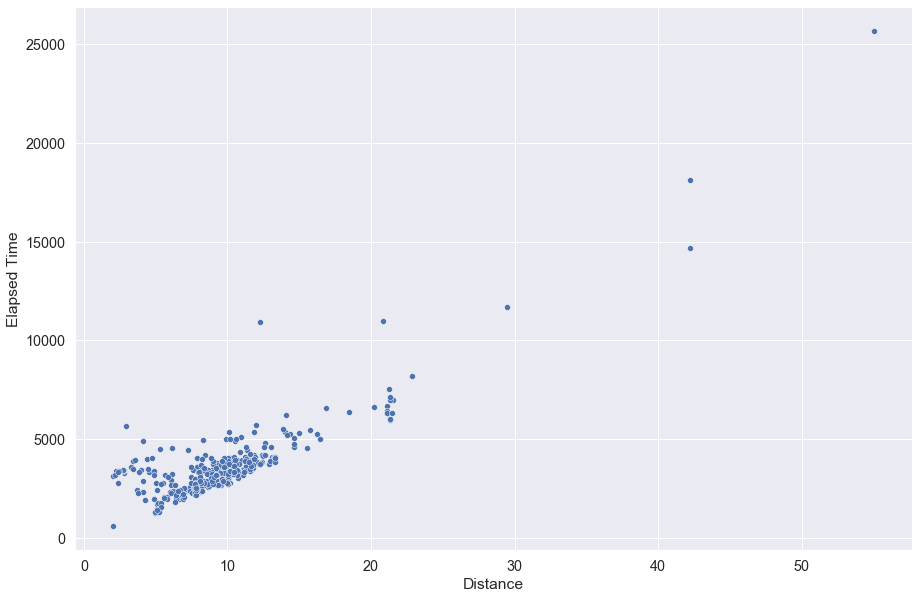

In [7]:
sns.scatterplot(data=df , x="Distance", y= "Elapsed Time")

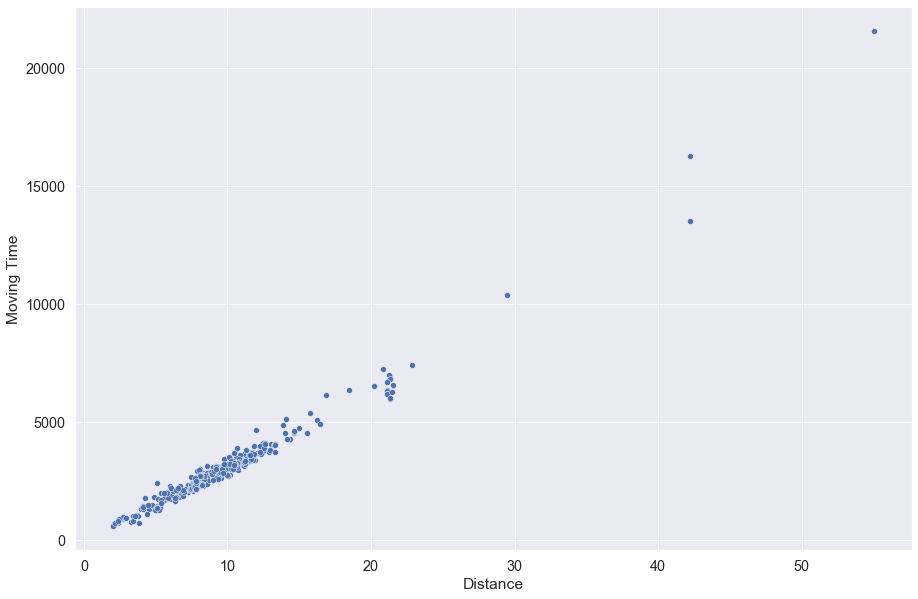

In [8]:
sns.scatterplot(data=df , x="Distance", y= "Moving Time")
# plt.ylim(0,10000)

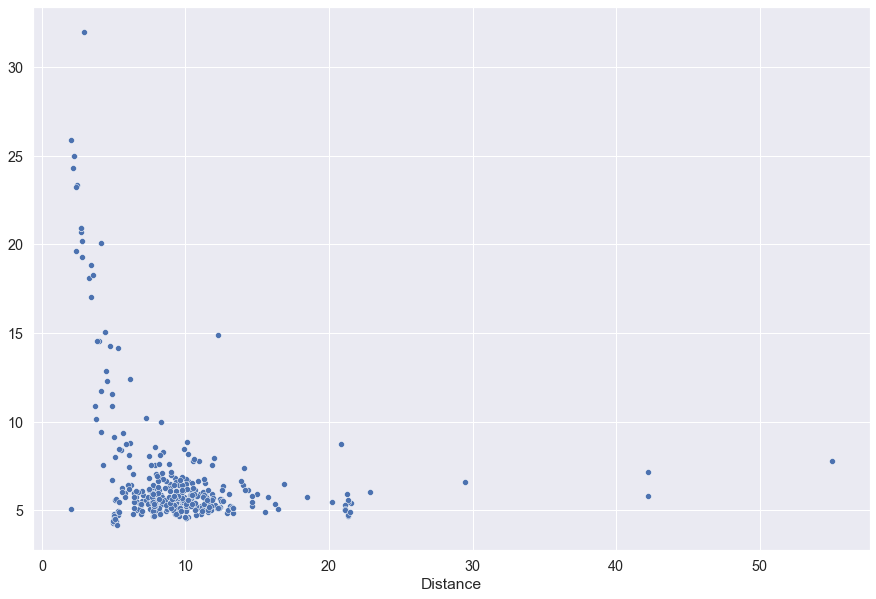

In [9]:
sns.scatterplot(x=df["Distance"] ,y= df["Elapsed Time"]/ df["Distance"]/60)

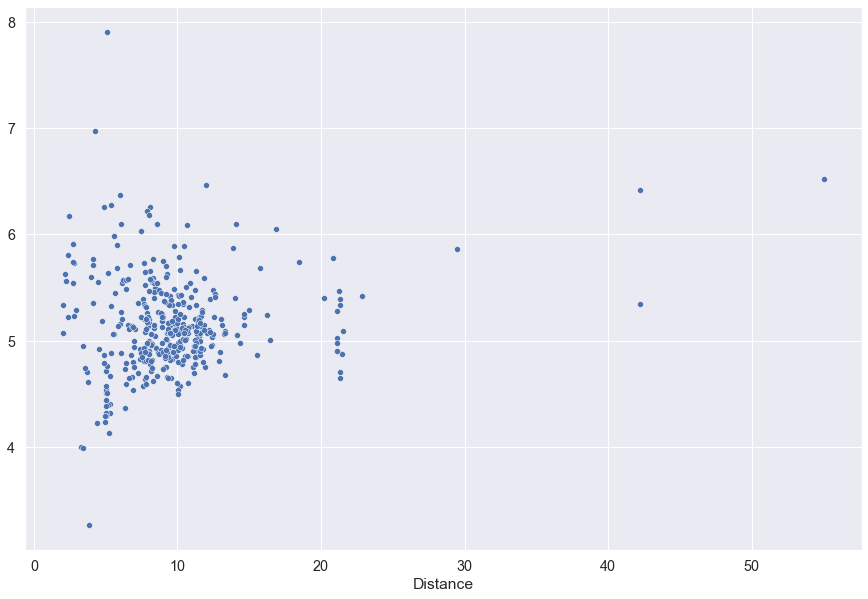

In [10]:
sns.scatterplot(x=df["Distance"] ,y= df["Moving Time"]/ df["Distance"]/60)

In [11]:
df.describe()

,Elapsed Time,Moving Time,Distance
count,398.000000,398.000000,398.000000
mean,3533.949749,2995.437186,9.625025
std,1939.261282,1750.500324,4.971950
min,621.000000,621.000000,2.010000
25%,2688.750000,2284.500000,7.577500
50%,3272.000000,2806.000000,9.240000
75%,3822.000000,3336.750000,10.832500
max,25639.000000,21532.000000,55.010000


In [12]:
df["Type"] = "Run"
df

,Elapsed Time,Moving Time,Distance,Type
1,2972,2715.0,9.29,Run
3,5023,3046.0,9.90,Run
5,1440,1358.0,5.02,Run
6,3450,3249.0,10.64,Run
8,6972,6574.0,21.53,Run
...,...,...,...,...
462,3185,2996.0,9.18,Run
463,2513,2503.0,7.84,Run
464,3587,3222.0,9.78,Run
465,3342,3170.0,10.42,Run


In [13]:
# data1 = {
#     "Type": ["segment"],
#     "Distance": [2.05],
#     "Elapsed Time": [8*60 +24],
#     "Moving Time" : [8*60+24]
# }

# df = df.append( pd.DataFrame(data1))
# df
def add_new_result(time, distance,data_frame=df,type_of_assignment="Segment"):
    
    # data1 = {
    # "Type": [type],
    # "Distance": [distance],
    # "Elapsed Time": [time],
    # "Moving Time" : [time] 
    # }
    data_frame.loc[len(data_frame)] =  [time,None,time,distance,type_of_assignment]
    print(data_frame)
    return data_frame

    # return data_frame.append( pd.DataFrame(data1),ignore_index=True)

In [14]:
# Add segments
run_type = []
distance = []
time = []

run_type.append("Segment")
distance.append(2.05)
time.append(8*60 + 24)

run_type.append("Segment")
distance.append(0.54)
time.append(1*60 + 45)


run_type.append("Segment")
distance.append(0.54)
time.append(1*60 + 45)



# distance.append(8*60  +24 , 2.05,data_frame=df)
# distance.append(1*60  +45 , 0.54)
time.append(2*60 + 5)
time.append(1*60 + 37)
time.append(1*60 + 58)
time.append(1*60 + 51)
time.append(0*60 + 36)
time.append(0*60 + 57)
time.append(2*60 + 35)
time.append(2*60 + 0)
time.append(6*60 + 21)
time.append(0*60 + 57)
time.append(1*60 + 23)
time.append(2*60 + 17)
time.append(1*60 + 49)
time.append(1*60 + 50)
time.append(19*60 + 2)
time.append(1*60 + 55)
time.append(1*60 + 29)
time.append(1*60 + 6)
time.append(2*60 + 20)
time.append(0*60 + 18)
time.append(1*60 + 6)

distance.append( 0.57)
distance.append(0.49)
distance.append(0.6)
distance.append(0.59)
distance.append(0.27)
distance.append(0.35)
distance.append(0.63)
distance.append(0.57)
distance.append(1.51)
distance.append(0.32)
distance.append(0.46)
distance.append(0.65)
distance.append(0.55)
distance.append(0.41)
distance.append(4.48)
distance.append(0.59)
distance.append(0.49)
distance.append(0.4)
distance.append(0.67)
distance.append(0.11)
distance.append(0.4)

run_type = ["Segment"] * len(distance)
df_segmenty = {
    "Type": run_type,
    "Distance": distance,
    "Elapsed Time": time,
    "Moving Time": time
}
df = df.append(pd.DataFrame(df_segmenty), ignore_index=True)



In [15]:
# Rekordy 
distance = []
time = []
# # Add records (Estimated Best Effords)
distance.append(0.804)
distance.append(1)
distance.append(1.61)
distance.append(3.21)
distance.append(5)
distance.append(10)
distance.append(15)
distance.append(16.09)
distance.append(20)
distance.append(21.0975)
distance.append(30)
distance.append(42.195)

time.append(3*60  +12 )
time.append(2*60  +32 )
time.append(6*60  +13)
time.append(12*60  +56)
time.append(20*60  +39)
time.append(44*60  +28 )
time.append(9*60 + 1*3600  +40)
time.append(14*60 + 1*3600  +42)
time.append(32*60 + 1*3600  +56)
time.append(38*60 + 1*3600  +5)
time.append(47*60 + 2*3600  +50)
time.append(4*60 + 4*3600  +1 )
 
run_type = ["Records"] * len(distance)
df_rekordy = {
    "Type": run_type,
    "Distance": distance,
    "Elapsed Time": time,
    "Moving Time": time
}
df = df.append(pd.DataFrame(df_rekordy), ignore_index=True)

In [16]:
distance = []
time = []

distance.append(0.2)
time.append(33)
distance.append(0.4)
time.append(1*60 + 6 )

run_type = ["Lap"] * len(distance)
df_lap = {
    "Type": run_type,
    "Distance": distance,
    "Elapsed Time": time,
    "Moving Time": time
}
df = df.append(pd.DataFrame(df_lap), ignore_index=True)

In [17]:
df[df["Type"]=="Records"]

,Elapsed Time,Moving Time,Distance,Type
422,192,192.0,0.8040,Records
423,152,152.0,1.0000,Records
424,373,373.0,1.6100,Records
425,776,776.0,3.2100,Records
426,1239,1239.0,5.0000,Records
427,2668,2668.0,10.0000,Records
428,4180,4180.0,15.0000,Records
429,4482,4482.0,16.0900,Records
430,5576,5576.0,20.0000,Records
431,5885,5885.0,21.0975,Records


In [18]:
df["Elapsed Pace"]  = df["Elapsed Time"]/ df["Distance"]
df["Moving Pace"]  = df["Moving Time"]/ df["Distance"]
df.describe()

,Elapsed Time,Moving Time,Distance,Elapsed Pace,Moving Pace
count,436.000000,436.000000,436.000000,436.000000,436.000000
mean,3350.667431,2859.089450,9.210107,386.588903,301.134738
std,2143.703015,1949.958351,5.649129,215.102938,39.009134
min,18.000000,18.000000,0.110000,133.333333,133.333333
25%,2496.500000,2059.250000,6.597500,305.292135,289.445066
50%,3210.500000,2752.000000,9.045000,332.715762,304.566872
75%,3806.250000,3315.000000,10.725000,371.715432,320.400548
max,25639.000000,21532.000000,55.010000,1921.621622,474.117647


In [19]:
df.to_csv('../data/running_data.csv', index=False)

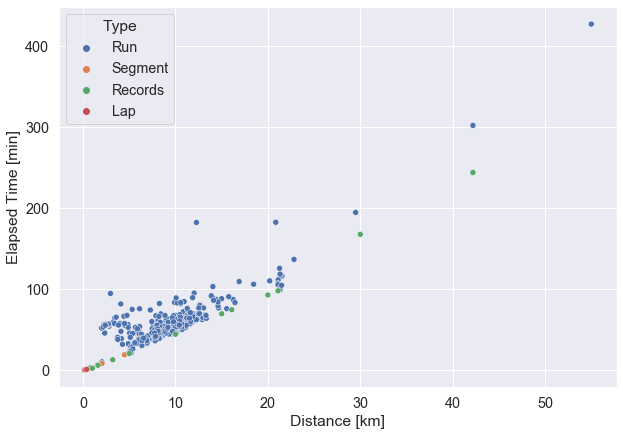

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_ylabel('Elapsed Time [min]')
ax.set_xlabel('Distance [km]')
# ax.set_title('Pace of world and private records')
sns.scatterplot(data=df , x="Distance",y=df["Elapsed Time"]/60, hue="Type")
# plt.set_xlabel(r'')
plt.savefig("../images/Elapsed_time.png",dpi=300)

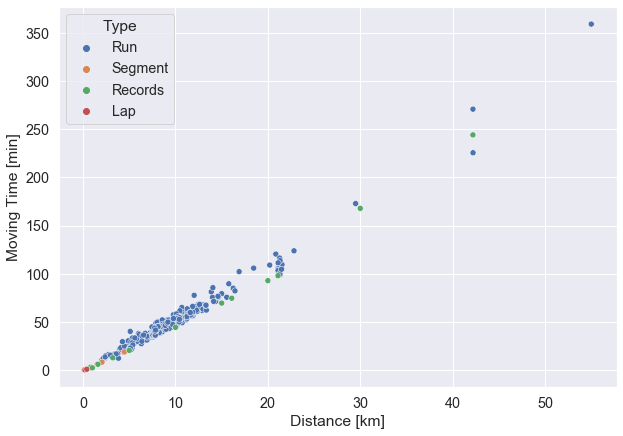

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_ylabel('Moving Time [min]')
ax.set_xlabel('Distance [km]')
sns.scatterplot(data=df , x="Distance",y=df["Moving Time"]/60, hue="Type")
plt.savefig("../images/Moving_time.png",dpi=300)

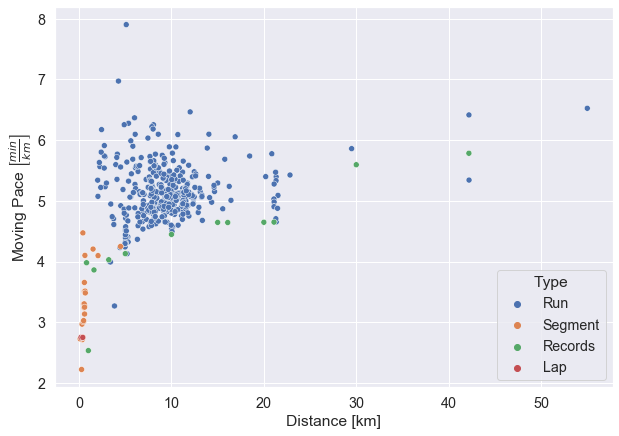

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_ylabel(r'Moving Pace $\left[\frac{min}{km}\right]$')
ax.set_xlabel('Distance [km]')
sns.scatterplot(data=df , x="Distance",y=df["Moving Pace"] / 60, hue="Type")
# plt.ylim(2.5,7)
plt.savefig("../images/moving_pace.png",dpi=300)

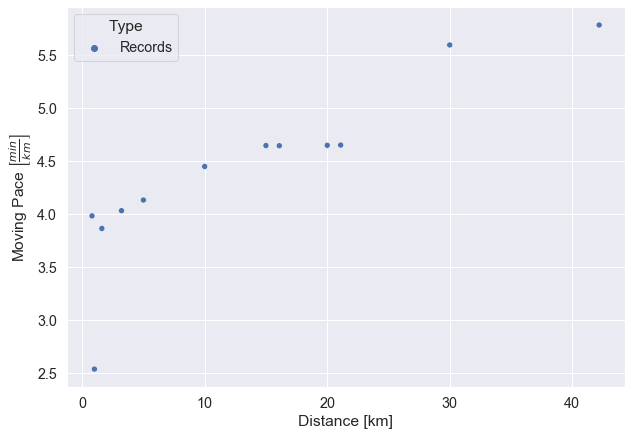

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_ylabel(r'Moving Pace $\left[\frac{min}{km}\right]$')
ax.set_xlabel('Distance [km]')
sns.scatterplot(data=df[df["Type"] == "Records"] , x="Distance",y=df["Moving Pace"] / 60, hue="Type")
# plt.ylim(2.5,6)
plt.savefig("../images/records.png",dpi=300)

In [24]:
df[ df["Type"] == "Records" ]

,Elapsed Time,Moving Time,Distance,Type,Elapsed Pace,Moving Pace
422,192,192.0,0.8040,Records,238.805970,238.805970
423,152,152.0,1.0000,Records,152.000000,152.000000
424,373,373.0,1.6100,Records,231.677019,231.677019
425,776,776.0,3.2100,Records,241.744548,241.744548
426,1239,1239.0,5.0000,Records,247.800000,247.800000
427,2668,2668.0,10.0000,Records,266.800000,266.800000
428,4180,4180.0,15.0000,Records,278.666667,278.666667
429,4482,4482.0,16.0900,Records,278.558111,278.558111
430,5576,5576.0,20.0000,Records,278.800000,278.800000
431,5885,5885.0,21.0975,Records,278.943003,278.943003


In [25]:
data = df.copy()

In [26]:
data["dist_category"] = data.apply(lambda x : x.Distance //1 if x.Distance > 1 else x.Distance , axis=1 )

In [27]:
data = data.sort_values('Moving Pace').drop_duplicates('dist_category').sort_values('Distance')

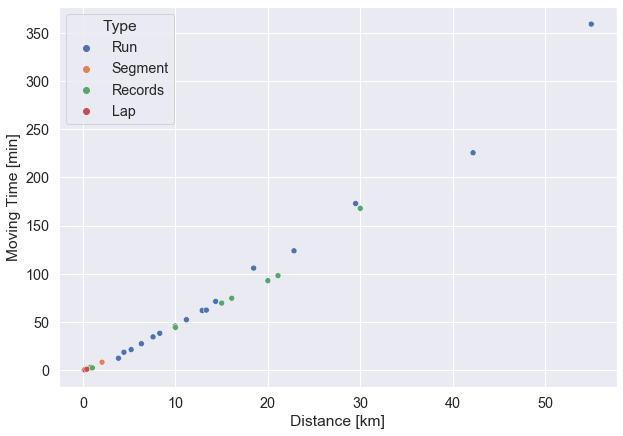

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_ylabel('Moving Time [min]')
ax.set_xlabel('Distance [km]')
sns.scatterplot(data=data , x= "Distance", y = df["Moving Time"]/60, hue="Type")
plt.savefig("../images/moving_timie_clean.png",dpi=300)

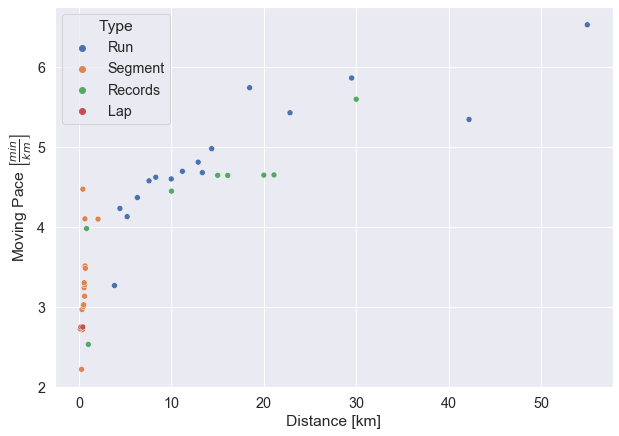

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_ylabel(r'Moving Pace $\left[\frac{min}{km}\right]$')
ax.set_xlabel('Distance [km]')
sns.scatterplot(data=data, x= "Distance", y= df["Moving Pace"]/60, hue = "Type")
# plt.xscale("log")
plt.grid(True)
plt.savefig("../images/moving_pace_clean.png",dpi=300)

kobiety - róż
faceci - niebieski
maciek - zielony
świat - niebieski
różne pojedyncze rzeczy - różowy

jak są dane i fit - to dane niebieskie a fit różowy

(0, 5.5)

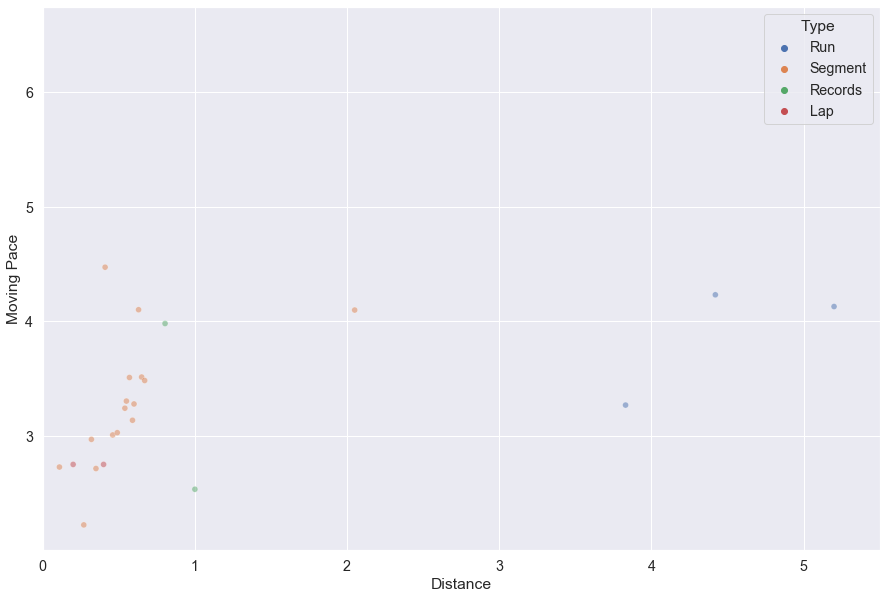

In [30]:
sns.scatterplot(data=data, x= "Distance", y= df["Moving Pace"]/60, hue = "Type",alpha=0.5)
plt.xlim(0,5.5)